# Aula 11 - Regressão Linear

**Objetivo**: Aprender o que é Regressão Linear e introduzir intuições sobre o Método do Gradiente e o Método do Gradiente Estocástico assim como os problemas de regressão de aprendizagem de máquina. 

## Defininição - Regressão Linear

> Uma regressão linear faz uma predição simplesmente computando uma soma ponderada dos atributos (*features*), mais uma constante chamada viés (*bias*), também chamado de constante (*intercept*).

<img src="images/reg-linear.png" alt="reg-linear" style="width: 400px;"/>

$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots \theta_n x_n$$

$\hat{y}$ - valor previsto

$\theta$ - parâmetro do modelo

$n$ - número de atributos (*features*)

$x_i$ - o valor do *inésimo* atributo (*feature*)

### Exemplo

$\mathrm{preço~de~residência} = 4500 + 1000\times \mathrm{quartos} + 120 \times \mathrm{m}^2 + 3000 \times \mathrm{banheiros}$

### *Mean Squared Error* (MSE) - Erro Quadrático Médio

$$MSE = \frac{1}{m}\Sigma_{i=1}^{m}{(\hat{y}_i - y_i)^2}$$

### *Mean Absolute Error* (MAE) - Erro Absoluto Médio
$$MAE = \frac{1}{m}\Sigma_{i=1}^{m}{|\hat{y}_i - y_i|}$$

<img src="images/gradient-descent.gif" alt="gradient-descent-animation" style="width: 500px;"/>

<img src="images/gradient-descent-2.gif" alt="gradient-descent-animation" style="width: 500px;"/>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [12]:
# Criação do DataFrame
dataframe = pd.DataFrame()
dataframe['x'] = [5.1, 5.5, 5.9, 6.5, 6.8, 7.6, 8.3, 8.5, 9.1, 9.5]  # horas de estudo
dataframe['y'] = [2.0, 2.9, 4.0, 5.9, 6.0, 6.9, 8.0, 9.0, 9.9, 11.0] # pontuaçao alcançada
x_values = dataframe[['x']]
y_values = dataframe[['y']]

In [13]:
# treinamento do modelo de Regressão Linear
model = linear_model.LinearRegression()
model.fit(x_values, y_values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# mostrando os valores obtidos
print('Utilizando biblioteca Scikit-Learn')
print('y = ax + b')
print('a = %.2f => a inclinação da linha de tendência.' % model.coef_[0][0])
print('b = %.2f => o ponto onde a linha de tendência atinge o eixo y.' % model.intercept_[0])

Utilizando biblioteca Scikit-Learn
y = ax + b
a = 1.92 => a inclinação da linha de tendência.
b = -7.39 => o ponto onde a linha de tendência atinge o eixo y.


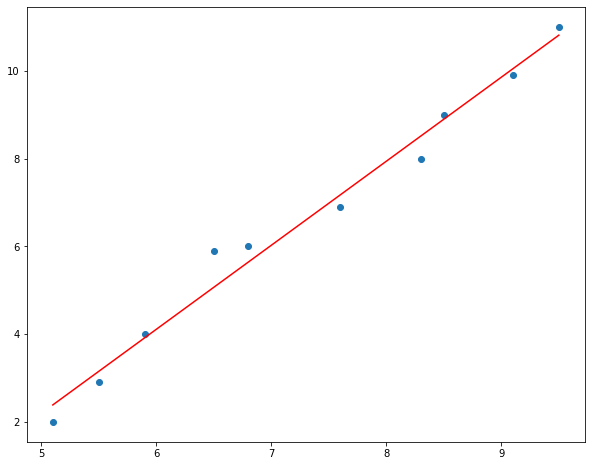

In [15]:
# plotando o gráfico da regressão
plt.figure(1, figsize=(10, 8))
plt.scatter(dataframe['x'].values, dataframe['y'].values)
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
fit_fn = np.poly1d(fit) 
plt.plot(dataframe['x'].values, fit_fn(dataframe['x'].values), 'r')
plt.show()

In [16]:
# informando um valor que não está originalmente na lista de valores
entrada = 6.3
predicao = model.predict(np.array([[entrada]]))
print('Predição:', predicao)

Predição: [[4.68236441]]


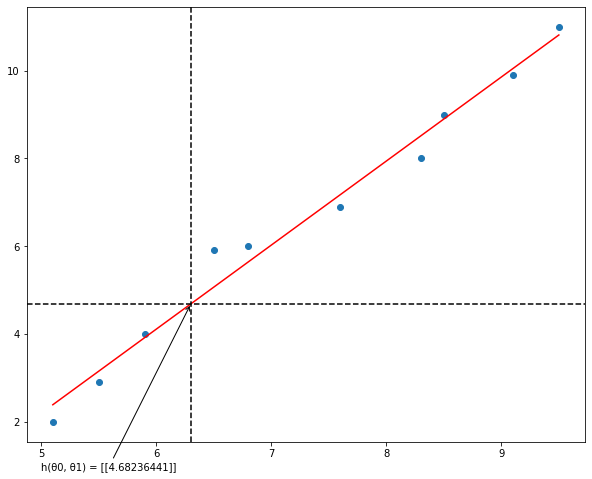

In [17]:
# traçando linhas das coordenadas para mostrar a inferência
plt.figure(1, figsize=(10, 8))
plt.scatter(dataframe['x'].values, dataframe['y'].values)
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
fit_fn = np.poly1d(fit)

txt ='h(θ0, θ1) = ' + str(predicao)
plt.annotate(txt, xy=(entrada, predicao), xytext=(5, 0.9), arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))

plt.plot(dataframe['x'].values, fit_fn(dataframe['x'].values), 'r')
plt.axvline(x=entrada, ymin=0, ymax=predicao, ls='--',c='black')
plt.axhline(y=predicao, ls='--',c='black')

In [18]:
# realizando regressão linear via carregamento de um arquivo
dados = pd.read_csv("dados1.csv", sep=',', header=None)
dados.shape

(50, 2)

In [19]:
dataframe = pd.DataFrame()
# coletando os dados da coluna (0)->x
dataframe['x'] = dados.values[:, 0]
dataframe['y'] = dados.values[:, -1]
x_values = dataframe[['x']]
y_values = dataframe[['y']]

y = ax + b
a = 0.06 => a inclinação da linha de tendência
b = 0.75 => o ponto onde a linha de tendência atinge o eixo y


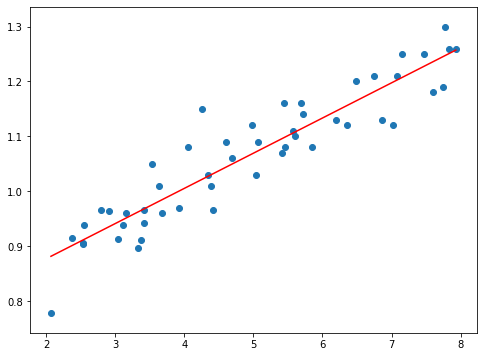

In [20]:
# treinar o modelo
modelo = linear_model.LinearRegression(normalize=True)
modelo.fit(x_values, y_values)
print('y = ax + b')
print('a = %.2f => a inclinação da linha de tendência' % modelo.coef_[0][0])
print('b = %.2f => o ponto onde a linha de tendência atinge o eixo y' % modelo.intercept_[0])

plt.figure(1, figsize=(8, 6))
plt.scatter(dataframe['x'].values, dataframe['y'].values)
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
fit_fn = np.poly1d(fit)
plt.plot(dataframe['x'].values, fit_fn(dataframe['x'].values), 'r')
plt.show()

In [21]:
entrada = 6.5
predicao = modelo.predict(np.array([[entrada]]))
print('Predição: ', predicao)

Predição:  [[1.16557617]]
